In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import bin_utils as ut
import bin_model_env as me
import tab_agents as tab

In [19]:
fnames=[
    # First worm
    'Data/traj12-11-2020_19-04-41.pkl', #none
    'Data/traj12-11-2020_19-14-38.pkl', #none
    'Data/traj12-11-2020_19-24-30.pkl', #xlim 800
    'Data/traj12-11-2020_19-35-31.pkl', #none # Seems like an especially bad dataset. Actually ruined all the others

    # Second worm
    'Data/traj12-11-2020_19-55-19.pkl', #none
    'Data/traj12-11-2020_20-05-11.pkl', #none
    'Data/traj12-11-2020_20-15-17.pkl', #none
    'Data/traj12-11-2020_20-25-06.pkl', #xlim 1430

    # Third worm
    'Data/traj30-10-2020_18-14-00.pkl', #none
    'Data/traj30-10-2020_18-34-10.pkl', #none

    # Fourth worm
    'Data/traj02-11-2020_15-53-56.pkl', #none 
    'Data/traj02-11-2020_16-14-45.pkl', #none 

    # Fifth worm
    'Data/traj03-11-2020_14-46-45.pkl', #none
    'Data/traj03-11-2020_15-08-07.pkl', #none
]

xlims = [1e6, 1e6, 800, 1e6, 1e6, 1e6, 1e6, 1430, 1e6, 1e6, 1e6, 1e6, 1e6, 1e6]

traj_df = ut.make_df(fnames,xlimit=xlims,time_steps=10)

In [20]:
dist_dict = ut.make_dist_dict(traj_df,bin_z=3)
worm = me.FakeWorm(dist_dict)

In [28]:
# Setting hparams
alpha = .1
gamma = 0.25
eps = .01
runtime = 10000

agents = []
evals = []
for i in range(5):
    mouse = tab.Q_Alpha_Agent(worm,gamma=gamma,epsilon=eps,alpha=alpha)
    mouse_learned, rewards, eval_rewards = tab.learner(mouse,worm,episodes=runtime)
    agents.append(mouse_learned)
    evals.append(eval_rewards)

Eval 0: average 8.059383198783149
Eval 1: average 7.244784865886464
Eval 2: average 7.7263308125439325
Eval 3: average 8.606616345719926
Eval 4: average 8.16131889856264
Eval 5: average 8.149923030742885
Eval 6: average 8.2340394057376
Eval 7: average 7.600028632495977
Eval 8: average 8.392544998379968
Eval 9: average 7.730763937988557
Eval -1: average 7.674411337874496
Eval 0: average 7.184438151376944
Eval 1: average 7.73559091996154
Eval 2: average 8.388505286987654
Eval 3: average 7.258503901248809
Eval 4: average 7.843204357494511
Eval 5: average 8.874412760936455
Eval 6: average 7.211909232562367
Eval 7: average 8.544718860031418
Eval 8: average 8.184258086716987
Eval 9: average 8.012640528931398
Eval -1: average 8.25825633760641
Eval 0: average 8.403072120460637
Eval 1: average 8.290708821728701
Eval 2: average 8.736769557330259
Eval 3: average 7.716956413501267
Eval 4: average 8.417566233218267
Eval 5: average 7.69460291172038
Eval 6: average 7.340720540468659
Eval 7: average 8

In [4]:
def true_policy(prod):
    if prod<0:
        action = 1
    else:
        action = 0
    return action
def on_policy(prod):
    return 1
def worst_policy(prod):
    if prod<0:
        action = 0
    else:
        action = 1
    return action
def off_policy(prod):
    return 0

def test_policy(policy,dist_dict):
    toy_worm = me.FakeWorm(dist_dict)
    steps = 1000000 # 1 mil steps
    eps = 1

    rews = []
    for ep in range(eps):
        obs = np.zeros((steps,2))
        rew = np.zeros(steps)
        action = 0
        for i in range(steps):
            ob,rew[i],done,info = toy_worm.step(action)
            obs[i,:] = toy_worm.obs2grid(ob)
            prod = np.sign(obs[i,0]*obs[i,1])
            action = policy(prod)
        rews.append(np.mean(rew))
    return np.array(rews)

In [13]:
true_pol = test_policy(true_policy,dist_dict)
print('True done')
worst_pol = test_policy(worst_policy,dist_dict)
print('Worst done')
on_pol = test_policy(on_policy,dist_dict)
print('On done')
off_pol = test_policy(off_policy,dist_dict)

True done
Worst done
On done


# With z=3 bins

Only good data from worms 1-2

In [144]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [9.05402475]
Worst: [2.2494562]
On: [2.24388789]
Off: [8.0863307]


In [191]:
# all worm except 5
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [7.15853003]
Worst: [1.46532732]
On: [1.45501005]
Off: [6.8316682]


In [186]:
# all worms
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [7.26688117]
Worst: [0.95417851]
On: [0.93702286]
Off: [6.73377225]


In [6]:
# all worms including trash dataset
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [6.96048364]
Worst: [-0.80655311]
On: [-0.82955243]
Off: [6.35505917]


# With z=1 bins

Only good data from worms 1-2

In [147]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [9.0652164]
Worst: [5.61732913]
On: [6.16864188]
Off: [8.08255256]


In [192]:
# All worms

# True: [7.24330271]
# Worst: [4.65548039]
# On: [4.83219013]
# Off: [6.7544734]

In [ ]:
# All worms except 5

# True: [7.13589293]
# Worst: [4.46747535]
# On: [4.54751136]
# Off: [6.80885612]

In [9]:
# all worms including trash dataset
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [6.94277041]
Worst: [4.28330524]
On: [4.54150448]
Off: [6.35686491]


# With no bins

Only good data from worms 1-2

In [138]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [3.03356785]
Worst: [1.38634594]
On: [2.39552487]
Off: [1.76627118]


Worm 3

In [154]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [10.27205653]
Worst: [0.50273463]
On: [2.60095887]
Off: [10.32568582]


Worm 4

In [159]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [-3.19705714]
Worst: [0.60875541]
On: [-1.67442187]
Off: [-1.78354276]


In [167]:
# Worm2 plus first of worm4
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [3.3547781]
Worst: [1.19887201]
On: [1.85735921]
Off: [2.23000062]


In [171]:
# Worm2 plus second of worm4
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [2.04377062]
Worst: [0.14640855]
On: [0.93816734]
Off: [1.07694557]


In [181]:
# Worm2 plus worm4
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [2.14049393]
Worst: [1.30133592]
On: [2.30530855]
Off: [1.01190604]


Worm 5

In [163]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [0.82487104]
Worst: [-0.89550885]
On: [1.94982146]
Off: [-1.62807547]


In [177]:
# All worms
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [0.68028061]
Worst: [0.98512843]
On: [2.24454905]
Off: [-0.18661986]


In [14]:
# all worms including trash dataset
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [0.79046925]
Worst: [0.67312569]
On: [2.05114197]
Off: [-0.38360921]


# All data policies 

## Bin 3, best from grid search

In [22]:
def make_detpol():
    detpol = np.zeros((13,13))
    for i_ind,i in enumerate(np.linspace(-1,1,13)):
        for j_ind,j in enumerate(np.linspace(-1,1,13)):
            detpol[i_ind,j_ind] = -np.sign(i*j)
    detpol = detpol[:-1,:-1]
    return detpol

def pol_diff(agent, detpol):
    # Compares the greedy policy given by Qtab ([12,12,2]) and the deterministic policy.
    # Returns MSE.
    Qpol = np.sign(agent.Qtab[:,1].reshape(12,12) - agent.Qtab[:,0].reshape(12,12))
    return np.mean(np.square(Qpol-detpol))

def make_fname(label,alpha,gamma,eps,runtime,it):
    return './Outputs_11_30/'+label+'_a'+str(alpha)+'g'+str(gamma)+'e'+str(eps)+'r'+str(runtime)+'_iter'+str(it)+'.json'

def get_avs(label,alpha,gamma,eps,runtime):
    # Return average eval 
    if runtime==2:
        eval_vecs = np.zeros((5,11))
        rew_vecs = np.zeros((5,10000))
    elif runtime==0:
        eval_vecs = np.zeros((5,21))
        rew_vecs = np.zeros((5,20000))
    else:
        raise ValueError('Invalid runtime')
    
    detpol = make_detpol()    
    Qmse = np.zeros(5)
    for it in range(5):
        with open(make_fname(label,alpha,gamma,eps,runtime,it),'rb') as f: 
            agent = pickle.load(f)
        eval_vecs[it,:] = agent.eval_rewards
        #rew_vecs[it,:] = agent.rewards
        Qmse[it] = pol_diff(agent, detpol)
    return np.mean(eval_vecs,axis=0),np.mean(Qmse) #,np.mean(rew_vecs,axis=0)

In [29]:
detpol = make_detpol()
Qpols = []
for i in range(5):
    Qpols.append(np.sign(agents[i].Qtab[:,1].reshape(12,12) - agents[i].Qtab[:,0].reshape(12,12)))

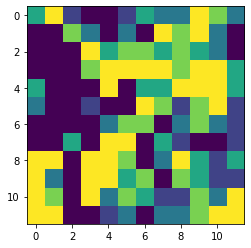

In [25]:
Qpols = np.array(Qpols)
plt.imshow(np.mean(Qpols,axis=0))

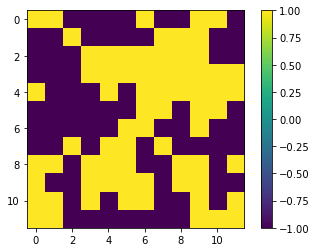

In [26]:
plt.imshow(np.sign(np.mean(Qpols,axis=0)))
plt.colorbar()

In [27]:
detpol = make_detpol()
np.mean(np.square(detpol-np.sign(np.mean(Qpols,axis=0))))

1.3541666666666667

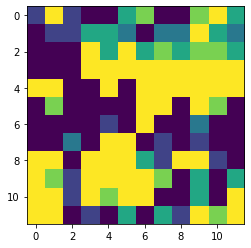

In [30]:
Qpols = np.array(Qpols)
plt.imshow(np.mean(Qpols,axis=0))

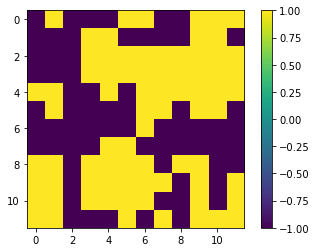

In [31]:
plt.imshow(np.sign(np.mean(Qpols,axis=0)))
plt.colorbar()

In [32]:
detpol = make_detpol()
np.mean(np.square(detpol-np.sign(np.mean(Qpols,axis=0))))

1.3263888888888888